# Homework 3: Softmax Regression
## Due October 3rd

## 1 Loading Digits
One of the most common uses of contemporary machine learning applications is in the processing of large image datasets.  One of the earliest commercial applications of ML was in mapping a handwritten digit (say, from a scanned copy of a check) to its corresponding digital representation.  This fits very well in our framework for machine learning if we recognize that the pixel values in an image can be viewed as a vector of features $\mathbf{x}$, and that the prediction that we're aiming for is the numerical digit:
$$
\mathcal{F}(\mathbf{x},\mathbf{w}) = y
$$
$$
y \in \{0,1,\ldots,9\}.
$$
In this exercise, we will use softmax regression as a model to map 8x8 grayscale images to digit labels.  

Our first course of action will be to load a dataset. Fortunately, scikit-learn comes prepackaged with this dataset, simply called "the digits dataset".

In [1]:
import sklearn as skl
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets  # Import the sklearn datasets module

data = datasets.load_digits()

x = data.data
y = data.target


x_train,x_test,y_train,y_test =  skl.model_selection.train_test_split(x,y)

print(x.shape)

(1797, 64)


In [ ]:
print(len(x[0]))

Note the shape of $x$.  It has 1797 digit instances and 64 features.  The 64 entries represent a flattened version of an 8x8 image.  In fact, if we want to recover the associated image, we can just reshape the entry back into an 8x8 array

This digit is a 9


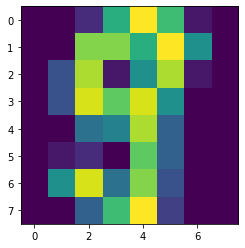

In [2]:
import matplotlib.pyplot as plt
plt.imshow(x[547,:].reshape((8,8)))
print("This digit is a",y[547])
plt.show()

However, for this model, we'll be using the flattened version.

## 2 Training digits (50 pts)
**Your task is to train a softmax regression model that takes an image from the digits dataset, and outputs a (hopefully accurate) prediction of what digit it is.** The application should be quite similar to what we did for the Iris dataset, albeit with a different $m$, $n$ (4 vs 64), and $N$ (3 vs 10).  The steps are as follows:
- Encode $y$ using a one-hot scheme.
- Initialize a weight matrix (n by N).
- Implement the softmax function.
- Implement the categorical cross-entropy function.
- Implement a function that returns the gradient of the objective function with respect to the weight matrix.
- Use gradient descent to find good values for $W$.  You may have to tune your learning rate $\eta$, and you'll want to devise a stopping criterion.

**After training your model, report the accuracy on both the training and test sets.**  Just for comparison, softmax regression yields around 97\% accuracy for me (albeit your numbers will vary due to the randomness in the dataset splitting).

In [3]:
import numpy as np

m = x_train.shape[0]
n = x_train.shape[1]
N = 10


#Encoding y into one-hot scheme. T in notational form
one_hot = np.zeros((y_train.shape[0],N))
for t,yy in zip(one_hot,y_train):
    t[yy]=1 

#initilize Phi training
Phitraining = np.hstack((x_train,np.ones((x_train.shape[0],1))))

#start with random weights
w = np.random.randn(n+1,N)

#weighted matrix achieved using matrix multiplication. A in notational form
wgt_mat = Phitraining @ w


def L(T,S): #borrowing previously made code -- cross-entropy
    return -np.sum(T*np.log(S))

def gradient(y_obs,y_pred,Phi): #borrowing gradient function 
    return - Phi.T @ (one_hot - y_pred)

def softmax(A): #softmax
    numerator = np.exp(A)
    denominator = numerator.sum(axis=1)
    return numerator/denominator[:,np.newaxis]

S = softmax(Phitraining@w)


eta = 3e-4
L_record = []
for t in range(10000):
    L_record.append(L(one_hot,S))
    S = softmax(Phitraining@w)
    g = gradient(one_hot,S,Phitraining)
    w -= eta*g
   
#watching the regression below
#print(L_record)
Phitest = np.hstack((x_test,np.ones((x_test.shape[0],1))))
S = softmax(Phitest @ w)
y_pred = np.argmax(S,axis=1)


Phi_test = np.hstack((x_test,np.ones((x_test.shape[0],1))))
S_test = softmax(Phi_test@w)
y_pred = np.argmax(S_test,axis=1)

print('Test set accuracy:', np.sum(y_pred == y_test)/len(y_pred))

<ipython-input-3-9f47bbe98589>:24: RuntimeWarning: divide by zero encountered in log
  return -np.sum(T*np.log(S))
<ipython-input-3-9f47bbe98589>:24: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(T*np.log(S))


Test set accuracy: 0.94


## 3 Training MNIST (25 pts)
The digits problem is interesting, but it's hardly 'big'.  It's also very low resolution, and has been heavily curated.  A more realistic dataset is given by the so-called [MNIST Dataset](https://en.wikipedia.org/wiki/MNIST_database), which is a set of over 70000 28x28 digits.  We can load it easily using scikit-learn

This digit is a 3


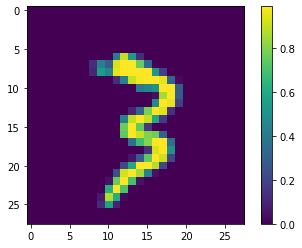

In [4]:
from sklearn import datasets  # Import the sklearn datasets module
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

#Load the dataset

data = datasets.fetch_openml('mnist_784')


x = data.data/256 # Note that MNIST hasn't yet been scaled to 0-1 from the original 8 it.  Dividing by 2^8 does this for us


y = data.target


x_train,x_test,y_train,y_test =  skl.model_selection.train_test_split(x,y)

plt.imshow(x[25000].reshape(28,28))
print("This digit is a",y[25000])
plt.colorbar()
plt.show()

**Adapt your code from above, and apply it to the MNIST dataset.** If your code is written sensibly, this should take almost no modification.  What it *will* require is substantially more computational time: be sure that your code is working properly on the digits dataset before graduating to MNIST.  

In [5]:
import numpy as np

m = x_train.shape[0]
n = x_train.shape[1]
N = 10


#Encoding y into one-hot scheme. T in notational form
one_hot = np.zeros((y_train.shape[0],N))

for t,yy in zip(one_hot,y_train):
    t[int(yy)]=1 

#initilize Phi training
Phitraining = np.hstack((x_train,np.ones((x_train.shape[0],1))))

#start with random weights
w = np.random.randn(n+1,N)*1e-4

#weighted matrix achieved using matrix multiplication. A in notational form
wgt_mat = Phitraining @ w


def L(T,S): #borrowing previously made code -- cross-entropy
    return -np.sum(T*np.log(S))

def gradient(y_obs,y_pred,Phi): #borrowing gradient function 
    return - Phi.T @ (one_hot - y_pred)

def softmax(A): #softmax
    numerator = np.exp(A)
    denominator = numerator.sum(axis=1)
    return numerator/denominator[:,np.newaxis]

S = softmax(Phitraining@w)


eta = 1e-6
L_record = []
for t in range(5000):
    L_record.append(L(one_hot,S))
    S = softmax(Phitraining@w)
    g = gradient(one_hot,S,Phitraining)
    w -= eta*g
    if t%10 == 0:
        print(t,'Cost:', L_record[t])
   
#watching the regression below
#print(L_record)
Phitest = np.hstack((x_test,np.ones((x_test.shape[0],1))))
S = softmax(Phitest @ w)
y_pred = np.argmax(S,axis=1)


Phi_test = np.hstack((x_test,np.ones((x_test.shape[0],1))))
S_test = softmax(Phi_test@w)
y_pred = np.argmax(S_test,axis=1)


desired_array = [int(numeric_string) for numeric_string in y_test]
print('Test set accuracy:', np.sum(y_pred == desired_array)/len(y_pred))


0 Cost: 120884.95318036253
10 Cost: 98552.75284272303
20 Cost: 81503.38992952094
30 Cost: 69913.34418201543
40 Cost: 61808.78695777149
50 Cost: 55918.68378824033
60 Cost: 51474.36150695048
70 Cost: 48009.44482344127
80 Cost: 45232.73918757839
90 Cost: 42955.8943124582
100 Cost: 41052.76456378892
110 Cost: 39436.12034069836
120 Cost: 38043.89374738046
130 Cost: 36830.78917768588
140 Cost: 35763.00431382094
150 Cost: 34814.81072366957
160 Cost: 33966.27951860985
170 Cost: 33201.731754357475
180 Cost: 32508.65931450412
190 Cost: 31876.95839240644
200 Cost: 31298.375128771277
210 Cost: 30766.09806209493
220 Cost: 30274.45399959646
230 Cost: 29818.677941544152
240 Cost: 29394.736833357143
250 Cost: 28999.19298899891
260 Cost: 28629.097128005997
270 Cost: 28281.903780951772
280 Cost: 27955.40377663773
290 Cost: 27647.66990701061
300 Cost: 27357.012854599052
310 Cost: 27081.94518289185
320 Cost: 26821.151713847914
330 Cost: 26573.465004118883
340 Cost: 26337.844920931864
350 Cost: 26113.36153

2820 Cost: 16939.055051479652
2830 Cost: 16930.610337543985
2840 Cost: 16922.209599703532
2850 Cost: 16913.852448561236
2860 Cost: 16905.538499559352
2870 Cost: 16897.267372902126
2880 Cost: 16889.038693480063
2890 Cost: 16880.852090795583
2900 Cost: 16872.70719889017
2910 Cost: 16864.603656272902
2920 Cost: 16856.541105850352
2930 Cost: 16848.519194857843
2940 Cost: 16840.537574792
2950 Cost: 16832.595901344557
2960 Cost: 16824.693834337515
2970 Cost: 16816.83103765938
2980 Cost: 16809.007179202705
2990 Cost: 16801.221930802796
3000 Cost: 16793.474968177485
3010 Cost: 16785.765970868106
3020 Cost: 16778.09462218154
3030 Cost: 16770.46060913329
3040 Cost: 16762.863622391713
3050 Cost: 16755.303356223114
3060 Cost: 16747.779508437998
3070 Cost: 16740.29178033819
3080 Cost: 16732.839876665043
3090 Cost: 16725.423505548424
3100 Cost: 16718.04237845672
3110 Cost: 16710.696210147773
3120 Cost: 16703.38471862059
3130 Cost: 16696.107625068027
3140 Cost: 16688.864653830216
3150 Cost: 16681.655

## 4 Visualizing MNIST weights (25 pts)
Assuming that you've implemented softmax regression correctly, we'll have 785 weights associated with each class (if you use similar code to what I used for irises, this will be the 785 by 10 matrix $W$).  Recognizing that one of these 785 weights is the bias, that means that the remaining 784 weights (per class) are associated with exactly 1 pixel in the input image, and we can thus organize our weights into an *image*.  By doing this, we can learn a bit about the coherent structure that the softmax regressor is learning!

**Reshape your learned weights (excluding the bias parameters) to be an image of the same shape as the MNIST dataset (28 by 28).  Produce a plot of each of these ten images.**  You should see a fairly clear picture emerge. if you're seeing something that looks like white noise, then check to ensure you are reshaping the array in the correct order.

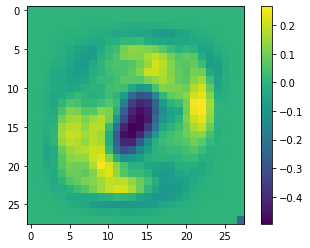

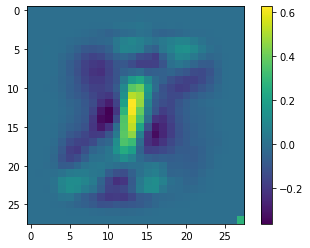

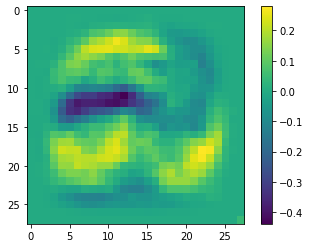

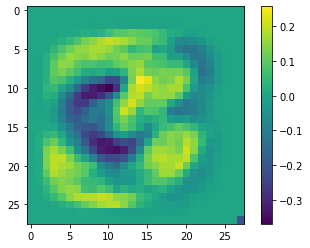

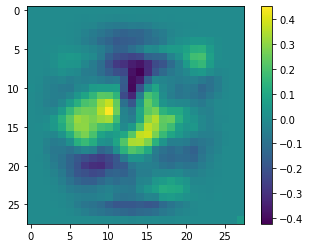

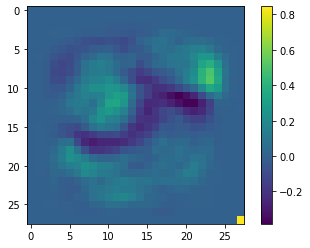

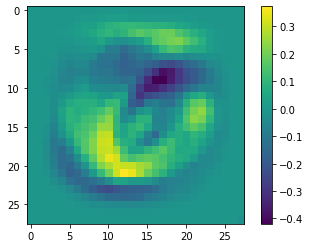

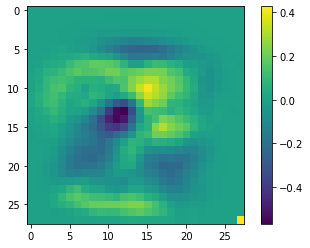

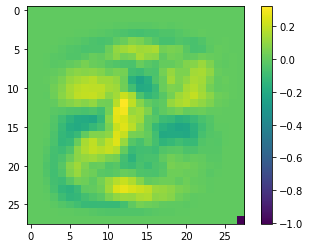

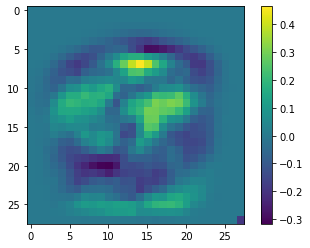

In [6]:
wmodified = np.transpose(w)

for thing in wmodified:
    plt.imshow(thing[1:].reshape(28,28))
    plt.colorbar()
    plt.show()

**Use these pictures of the weights to explain to me how softmax regression works as if I was your grandparent.  (This section will be graded both on technical correctness and accessibility!)**

In [ ]:
#We are determining how to identify these numbers by creating 10 different shapes that could be on any of these numbers and we
#then calculate to which degree they line up.
#We achieve these shapes by using something called softmax regression. The regression is just working downhill to fix a minimum 
#of a function. That will be the gradient (or steepness we want to set our line to) times a very small number to slowly work our
#way down and make sure we don't over shoot the minimum and essentially go through the earth of our conceptual slope.
#The softmax itself is just taking the items in our matrix, raising it by an exponent, and then dividing by the sum of all items
#in that matrix. If we back up a moment, it is really just a function of bayesian probability, squished down by a log.
#so, ln of the whole bayesian theorem P(x|y) = P(y|x) * P(X) / all things that could happen. This is repeated over and over 
#until we get very accurate probabilities. 